In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns

# set path to figures directory 
wd = os.getcwd()
img_dir = os.path.join(wd, 'Figures')
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

# set style for plots
sns.set_style("whitegrid", {'grid.linewidth': 0.5})

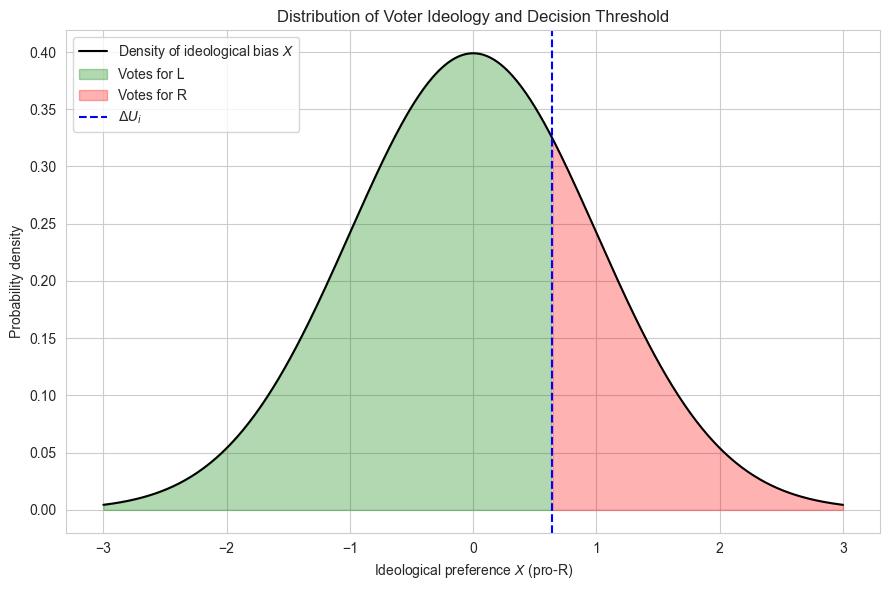

In [10]:
# Parameters
K = 1
epsilon = 0.5
C_R = 2.0
Delta_C = 1.0
C_L = C_R + Delta_C

# Utility difference
def U(C):
    if epsilon == 1:
        return K * np.log(C)
    else:
        return K * (C ** (1 - epsilon)) / (1 - epsilon)

U_diff = U(C_L) - U(C_R)

# Ideological bias distribution
X_vals = np.linspace(-3, 3, 500)
phi = norm.pdf(X_vals, loc=0, scale=1)
Phi = norm.cdf(X_vals, loc=0, scale=1)

# Set up the plot
fig, ax = plt.subplots(figsize=(9, 6))

# Plot PDF of ideological preferences
ax.plot(X_vals, phi, color='black', label='Density of ideological bias $X$')

# Shade regions: voters who prefer L (X < ΔU) and R (X > ΔU)
ax.fill_between(X_vals, phi, where=(X_vals < U_diff), color='green', alpha=0.3, label='Votes for L')
ax.fill_between(X_vals, phi, where=(X_vals >= U_diff), color='red', alpha=0.3, label='Votes for R')

# Annotate the cutpoint
ax.axvline(U_diff, color='blue', linestyle='--', label=r'$\Delta U_i$')

# Labels and legend
ax.set_xlabel('Ideological preference $X$ (pro-R)')
ax.set_ylabel('Probability density')
ax.set_title('Distribution of Voter Ideology and Decision Threshold')
ax.legend(loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(img_dir, 'dl86_voter_decision_ideology.png'), dpi=300)
plt.show()

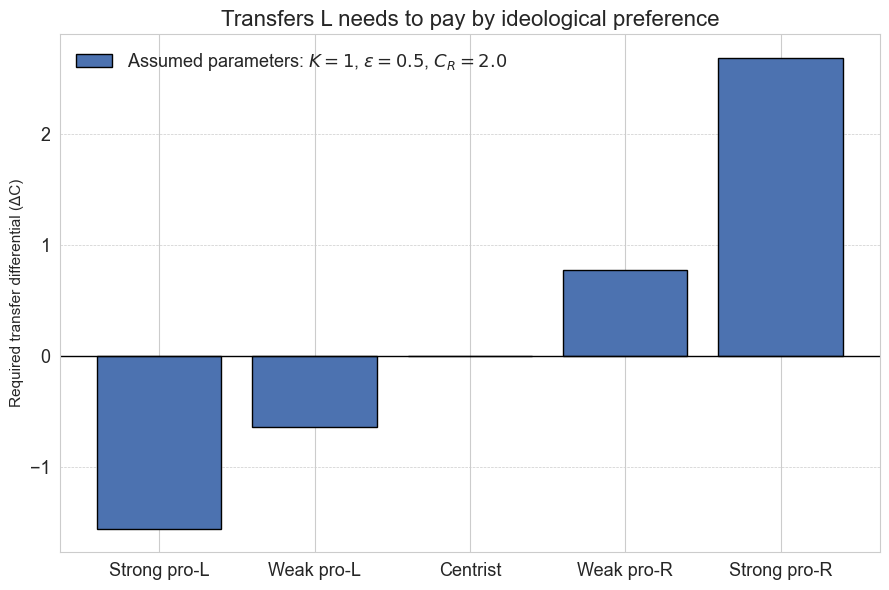

In [20]:
# Model parameters
K = 1
epsilon = 0.5
C_R = 2.0

# Ideological bias values
X_values = np.array([-1.5, -0.5, 0, 0.5, 1.5])
labels = ['Strong pro-L', 'Weak pro-L', 'Centrist', 'Weak pro-R', 'Strong pro-R']

# Function to calculate required C_L
def required_CL(X, C_R, K, epsilon):
    U_R = K * (C_R ** (1 - epsilon)) / (1 - epsilon)
    U_L_required = U_R + X
    return ((U_L_required * (1 - epsilon)) / K) ** (1 / (1 - epsilon))

# Compute required transfer differential
C_L_required = required_CL(X_values, C_R, K, epsilon)
Delta_C_required = C_L_required - C_R

# Plot
fig, ax = plt.subplots(figsize=(9, 6))
bars = ax.bar(labels, Delta_C_required, color='#4C72B0', edgecolor='black')

# Add horizontal line at zero
ax.axhline(0, color='black', linewidth=1)

# Axis labels and title
ax.set_ylabel('Required transfer differential (ΔC)', fontsize=11)
ax.set_title('Transfers L needs to pay by ideological preference', fontsize=16)

# Add grid and rotate x-ticks
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
# plt.xticks(rotation=20)

# Add legend with model parameters
param_text = f"Assumed parameters: $K = {K}$, $\\varepsilon = {epsilon}$, $C_R = {C_R}$"
ax.legend([bars], [param_text], loc='upper left', frameon=False, fontsize=13)

plt.tight_layout()
# Save the figure
plt.savefig(os.path.join(img_dir, 'dl86_transfer_differential.png'), dpi=300)
plt.show()
